In [1243]:
import pandas as pd

df = pd.read_csv('data.csv')

In [ ]:
'''

git remote add origin https://github.com/Root-014/Assessment.git
git branch -M main
git push -u origin main

'''

In [1265]:
import pmdarima as pm

In [1249]:
df.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,01/07/2019,"15,987","9,962",407,"21,223","3,715",NaN
1,30/08/2024,"16,436","10,705",225,"19,026","3,925",59
2,15/09/2023,"15,499","10,671",267,"18,421","4,519",61
3,28/12/2021,"1,756","2,352",0,"3,775",0,13
4,11/01/2023,"10,536","8,347",223,"14,072",0,48


In [1245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          1918 non-null   object
 1   Local Route   1918 non-null   object
 2   Light Rail    1918 non-null   object
 3   Peak Service  1918 non-null   object
 4   Rapid Route   1918 non-null   object
 5   School        1918 non-null   object
 6   Other         1916 non-null   object
dtypes: object(7)
memory usage: 105.0+ KB


In [1250]:
df.describe()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
count,1918,1918,1918,1918,1918,1918,1916
unique,1918,1794,1772,431,1827,865,144
top,01/07/2019,"2,035",0,0,"7,922",0,0
freq,1,5,6,609,4,901,230


In [1251]:
df.isna().any()

Date            False
Local Route     False
Light Rail      False
Peak Service    False
Rapid Route     False
School          False
Other            True
dtype: bool

In [1252]:
df.dtypes

Date            object
Local Route     object
Light Rail      object
Peak Service    object
Rapid Route     object
School          object
Other           object
dtype: object

In [1253]:
df['Date'] = pd.to_datetime(df['Date'], format= "%d/%m/%Y")

In [1254]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.replace(",", "").astype(int, errors='coerce')
    

In [1255]:
df.dtypes

Date            datetime64[ns]
Local Route              int32
Light Rail               int32
Peak Service             int32
Rapid Route              int32
School                   int32
Other                   object
dtype: object

In [1256]:
df_other = df
df_other.sort_values(['Date'],inplace=True)
df_otherm = df_other.set_index('Date')

In [1257]:
df_otherm.fillna(0,inplace=True)

In [1258]:
df_otherm.isna().sum()

Local Route     0
Light Rail      0
Peak Service    0
Rapid Route     0
School          0
Other           0
dtype: int64

In [1259]:

for col in df_otherm.select_dtypes(include='object').columns:
    df_otherm[col] = df_otherm[col].str.replace(",", "").astype(int, errors= 'ignore')
    if col == 'Other':
         df_otherm[col] =  pd.to_numeric(df_otherm[col],  errors='coerce').astype('Int32')

print(df_otherm.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1918 entries, 2019-07-01 to 2024-09-29
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Local Route   1918 non-null   int32
 1   Light Rail    1918 non-null   int32
 2   Peak Service  1918 non-null   int32
 3   Rapid Route   1918 non-null   int32
 4   School        1918 non-null   int32
 5   Other         1916 non-null   Int32
dtypes: Int32(1), int32(5)
memory usage: 61.8 KB
None


In [1178]:

df.drop('Other',axis=1,inplace=True)

In [1179]:
df.sort_values(['Date'],inplace=True)
dfm = df.set_index('Date')
df_month = dfm.resample('M').agg({
    'Local Route': 'sum','Light Rail': 'sum','Peak Service': 'sum','Rapid Route': 'sum','School' : 'sum' 
})
df_month.sort_index(inplace=True)

In [1180]:
df_month

,Local Route,Light Rail,Peak Service,Rapid Route,School
Date,,,,,
2019-07-31,406607,292641,9520,555002,63773
2019-08-31,456797,316416,9519,623134,119419
2019-09-30,424399,305334,9204,584540,111689
2019-10-31,407732,320310,9139,613572,79456
2019-11-30,413213,301518,9081,580930,114722
...,...,...,...,...,...
2024-05-31,416290,292526,7512,496846,114337
2024-06-30,343018,247191,6018,422557,89272
2024-07-31,350672,270169,7188,461635,50140


In [1198]:
df_otherm.sort_index(axis=1,inplace=True)

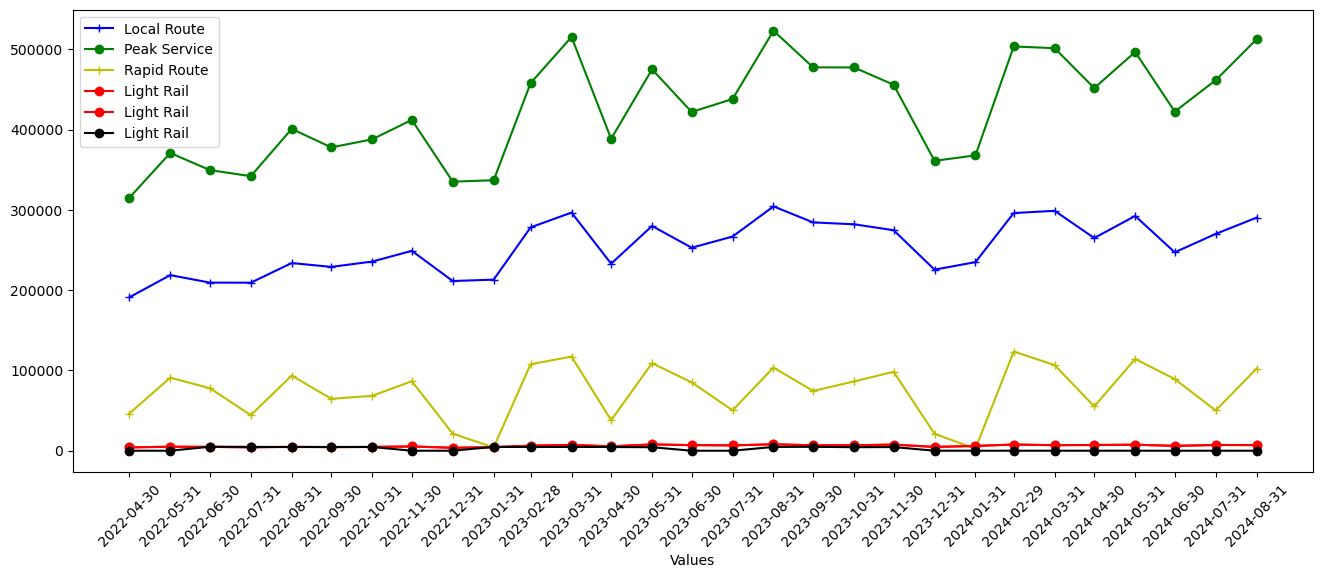

In [1205]:
import matplotlib.pyplot as plt

start, end = -30,-1
series = df_month.iloc[start:end,1]
X = series.index
Y1 = series.values
Y2= df_month.iloc[start:end,2].values
Y3 = df_month.iloc[start:end,3].values
Y4 = df_month.iloc[start:end,4].values
Y5 = df_otherm.iloc[start:end,5].values
X9 = df_otherm.iloc[start:end,5].index

plt.figure(figsize=(16, 6))

plt.plot(X,Y1,color='b', label=f'{df.columns[1]}', marker='+')

plt.plot(X,Y3,color='g', label=f'{df.columns[3]}', marker='o')
plt.plot(X,Y4,color='y', label=f'{df.columns[4]}', marker='+')

plt.plot(X,Y2,color='r', label=f'{df.columns[2]}', marker='o')

plt.plot(X,Y2,color='r', label=f'{df.columns[2]}', marker='o')
plt.plot(X,Y5,color='black', label=f'{df.columns[2]}', marker='o')
plt.xlabel("Values")
plt.xticks(X,rotation=45) 
plt.legend()


In [1478]:
dfm.index[-1] 

Timestamp('2024-09-29 00:00:00')

In [1480]:
df.iloc[:,1].values
next_7_days = pd.date_range(start=dfm.index[-1] + pd.Timedelta(days=1), periods=7, freq='M')
next_7_Month = pd.to_datetime(next_7_days,format= "%d/%m/%Y")
print(next_7_Month)

df.iloc[:,1].values
next_7_days = pd.date_range(start=dfm.index[-1] + pd.Timedelta(days=1), periods=7, freq='D')
next_7_days = pd.to_datetime(next_7_days,format= "%d/%m/%Y")
next_7_days = next_7_days[:]
print(next_7_days)




DatetimeIndex(['2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31',
               '2025-01-31', '2025-02-28', '2025-03-31'],
              dtype='datetime64[ns]', freq='M')
DatetimeIndex(['2024-09-30', '2024-10-01', '2024-10-02', '2024-10-03',
               '2024-10-04', '2024-10-05', '2024-10-06'],
              dtype='datetime64[ns]', freq='D')


In [329]:
diff1 = df_month.diff()[1:]

Light Rail


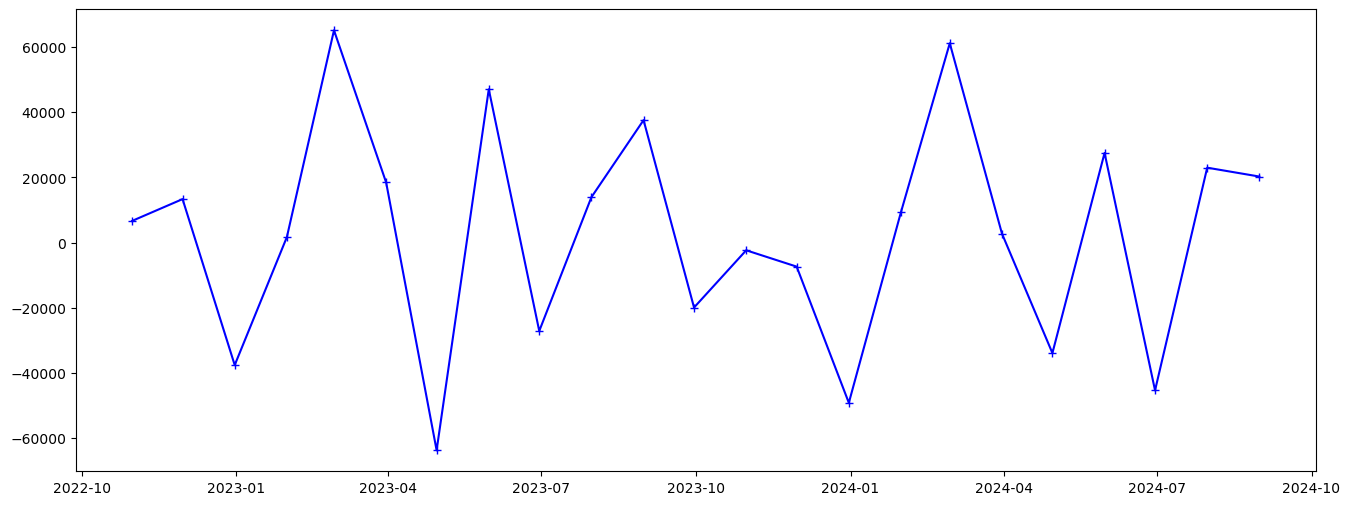

In [330]:
import matplotlib.pyplot as plt

start, end = -24,-1
print(diff1.columns[1])
column = 1
series = diff1.iloc[start:end,column]
X = series.index
Y1 = series.values



plt.figure(figsize=(16, 6))

plt.plot(X,Y1,color='b', label=f'{df.columns[2]}', marker='+')

Light Rail


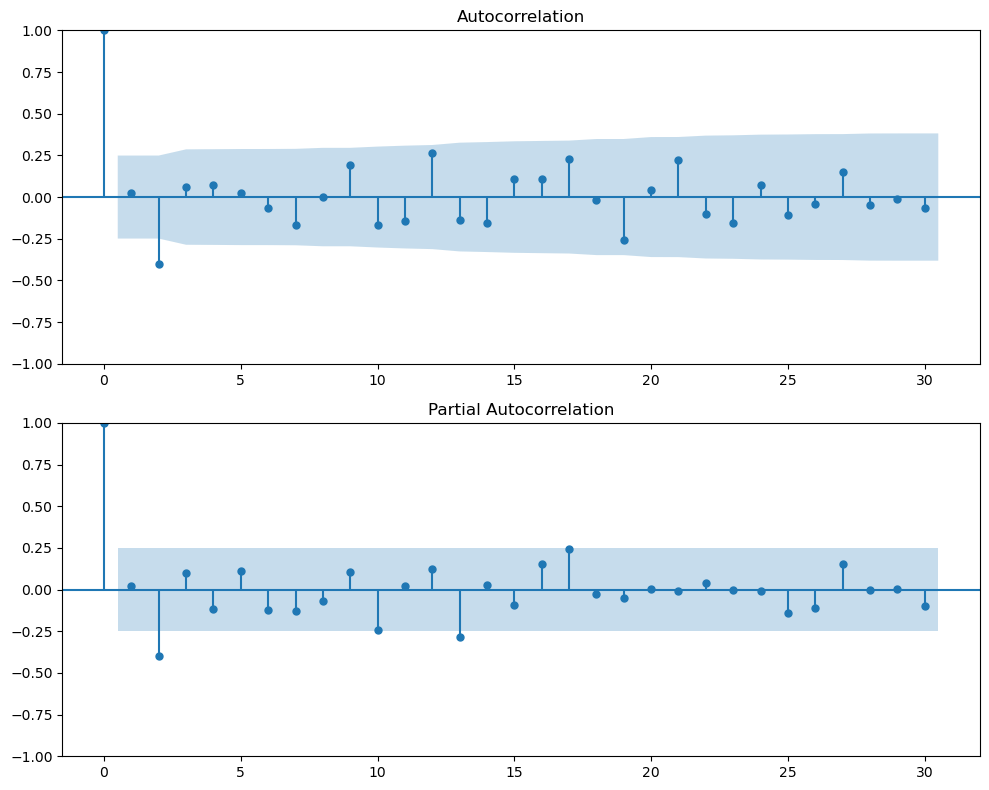

Light Rail


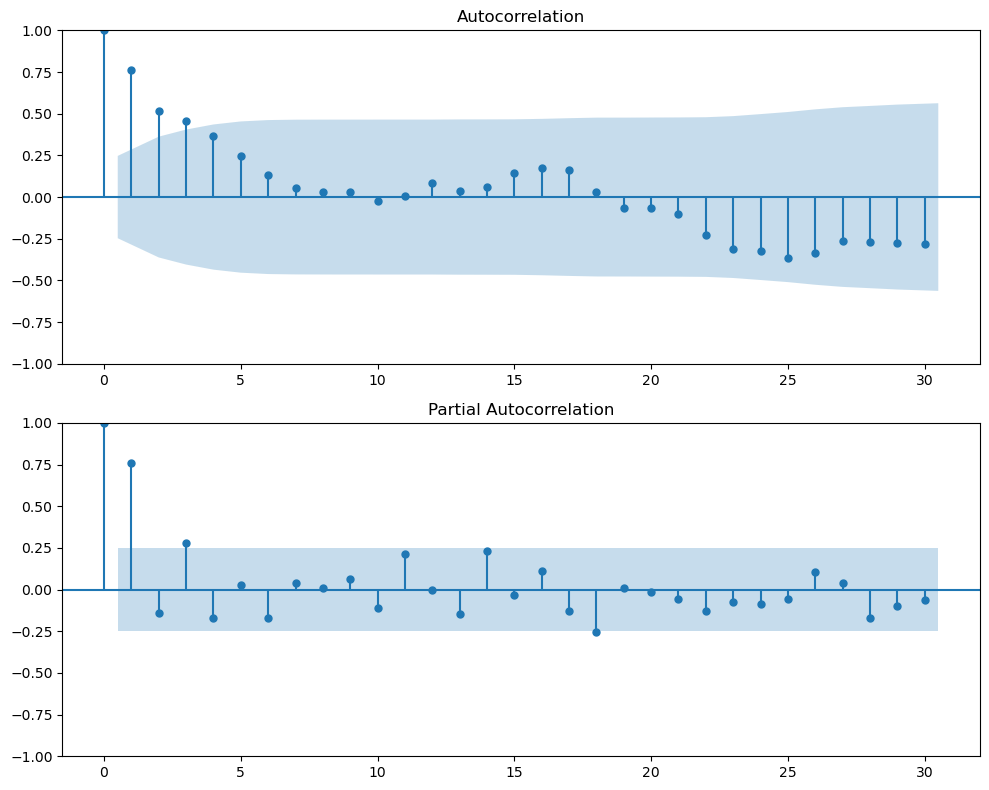

In [331]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf


fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(diff1[diff1.columns[1]], lags=30, ax=ax[0])
plot_pacf(diff1[diff1.columns[1]], lags=30, ax=ax[1])
print(diff1.columns[1])
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(df_month[df_month.columns[1]], lags=30, ax=ax[0])
plot_pacf(df_month[df_month.columns[1]], lags=30, ax=ax[1])
print(df_month.columns[1])
plt.tight_layout()
plt.show()



Light Rail


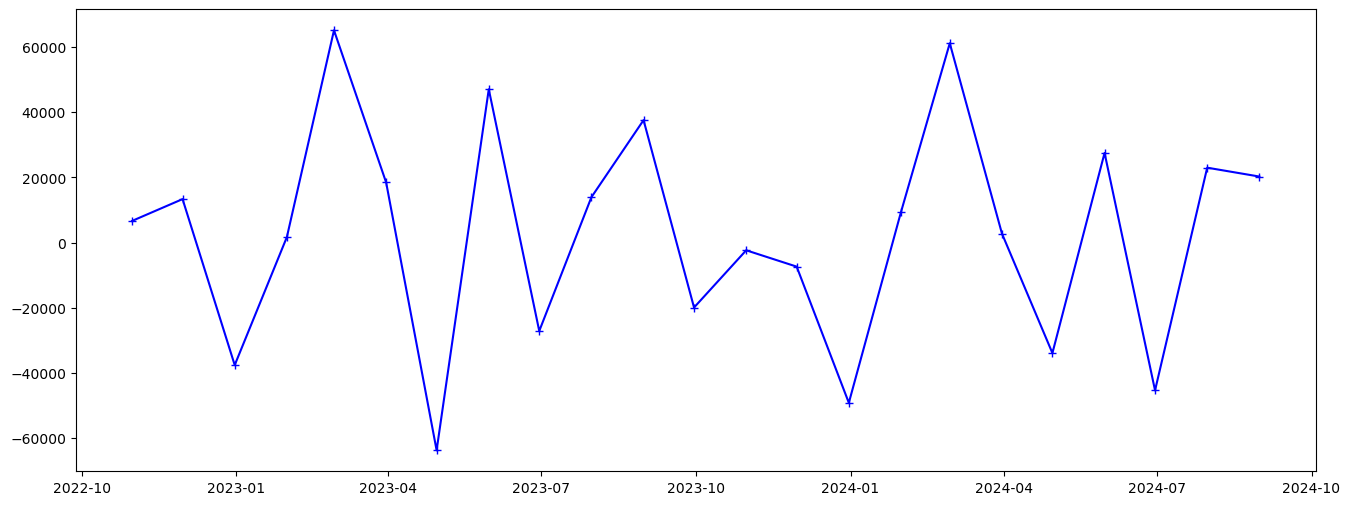

In [332]:
import matplotlib.pyplot as plt

start, end = -24,-1
print(diff1.columns[1])
column = 1
series = diff1.iloc[start:end,column]
X = series.index
Y1 = series.values

plt.figure(figsize=(16, 6))

plt.plot(X,Y1,color='b', label=f'{df.columns[2]}', marker='+')

Light Rail


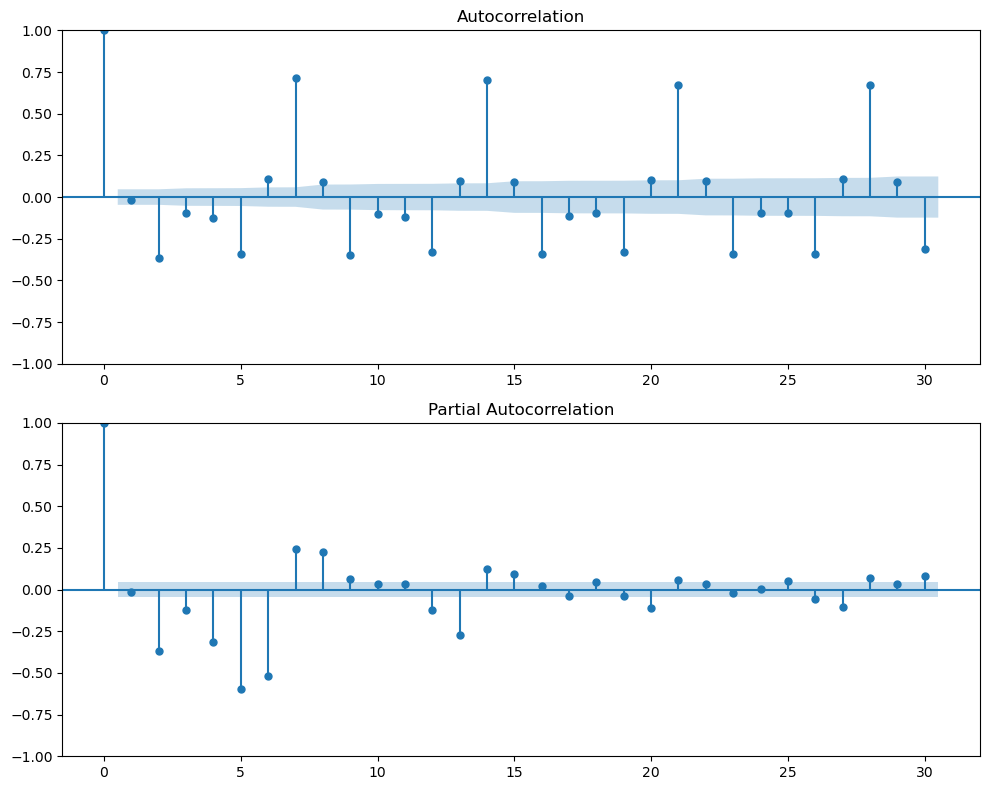

Light Rail


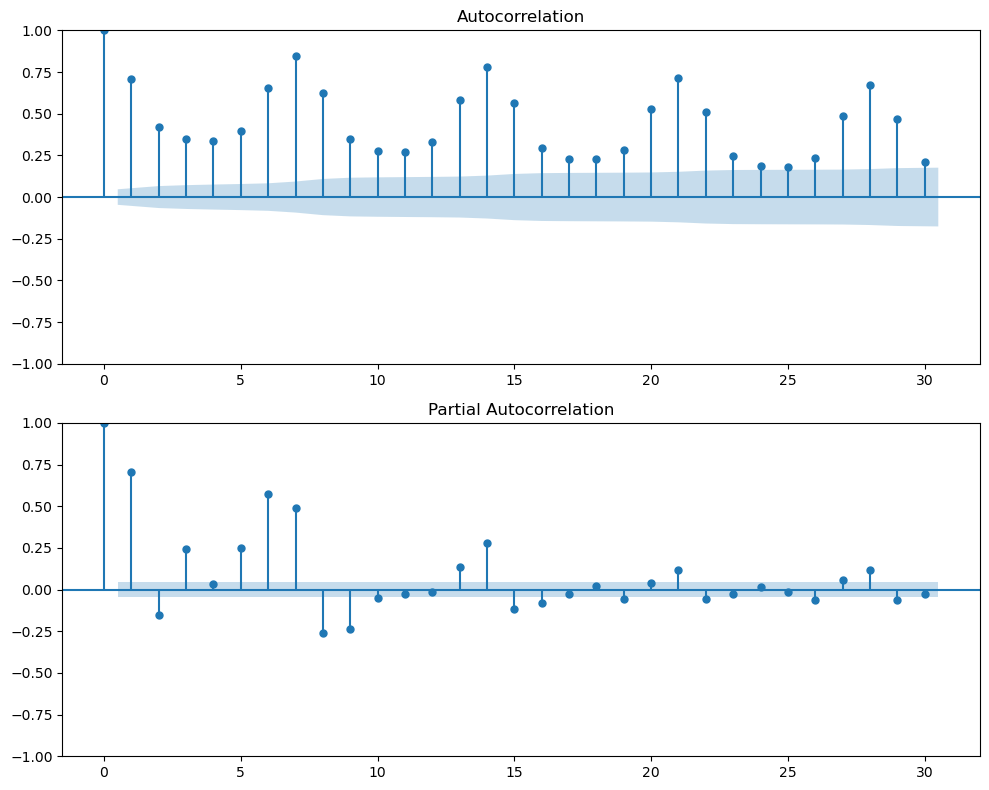

In [423]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

diff1 = dfm.diff()[1:]
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(diff1[diff1.columns[1]], lags=30, ax=ax[0])
plot_pacf(diff1[diff1.columns[1]], lags=30, ax=ax[1])
print(diff1.columns[1])
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(dfm[dfm.columns[1]], lags=30, ax=ax[0])
plot_pacf(dfm[dfm.columns[1]], lags=30, ax=ax[1])
print(dfm.columns[1])
plt.tight_layout()
plt.show()



In [334]:
df_t = dfm

In [335]:
# dfm = dfm.iloc[150:-1,:]

In [1558]:
def calculate_mape(actual, forecast):
    return (abs((actual - forecast) /( (actual + forecast)/2)).mean()) * 100

def calculate_RMSE(actual, forecast):
    from math import sqrt
    a = sqrt(((actual - forecast) **2).mean())
    return a

In [1490]:
df_train,df_test = df.iloc[:-4,:], df.iloc[-4:-1,:]
df_train.tail()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
1387,2024-09-21,28,832,0,64,0,0
1810,2024-09-22,21,577,0,49,0,0
1800,2024-09-23,56,1938,0,67,10,0
1689,2024-09-24,36,78,0,21,3,0
1662,2024-09-25,21,0,1,10,8,0


In [1491]:
df_test.tail()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
1330,2024-09-26,9,0,0,0,2,0
1731,2024-09-27,6,0,0,13,0,0
1652,2024-09-28,1,0,0,4,0,1


In [1618]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import ExponentialSmoothing


def ARIMA_Model(df,p,d,q, col_names,n_forecast,next_7_days):
    df_train,df_test = df.iloc[:-4,:], df.iloc[-4:-1,:]
    
    model = ARIMA(df_train[col_names],order=(p,d,q))
    model_fit = model.fit()

    arima_forecast = model_fit.forecast(steps=11)

    result = {
        'Date' : next_7_days,
        f'Forecast' : 0
    }

    result = pd.DataFrame(result).set_index('Date')
    dates = pd.concat([df_test, result], axis=1)
    
    dates['Forecast'] = arima_forecast



    # print(model_fit.summary())
    # print(pd.DataFrame(result))
    return dates,arima_forecast

def Auto_ARIMA(df,flag,days,col):

    df_train,df_test = df.iloc[:-4,:], df.iloc[-4:-1,:]

    if flag == 'S':
        model = pm.auto_arima(df_train[col], seasonal=True, m=7, stepwise=True, trace=True)
    else:
        model = pm.auto_arima(df_train[col], seasonal=False, stepwise=True, trace=True)

    forecast, conf_int = model.predict(n_periods=11, return_conf_int=True)
    result = {
        'Date' : days,
        f'Forecast' : 0
    }
    print(len(forecast))
    result = pd.DataFrame(result).set_index('Date')
    df_test['Forecast'] = forecast[:3]
    print(df_test,result)

    dates = pd.concat([df_test, result])
    dates['Forecast'] = forecast

    print(dates)

    
    return dates,model

def SARIMA_Model(df,sp , mp, col_names,n_forecast,days):

    df_train,df_test = df.iloc[:-4,:], df.iloc[-4:-1,:]
    sarima_model = SARIMAX(df_train[col_names], order= sp, seasonal_order= mp)
    sarima_fit = sarima_model.fit(disp=False)
    

    Sarima_forecast = sarima_fit.forecast(steps=11)
    
    
    result = {
        'Date' : days,
        f'Forecast' : 0
    }
    result = pd.DataFrame(result).set_index('Date')
    df_test['Forecast'] = Sarima_forecast[0:3]
    print(df_test,result)
    
    
    dates = pd.concat([df_test, result])
    print(dates)
    
    dates['Forecast'] = Sarima_forecast



    # print(model_fit.summary())
    # print(pd.DataFrame(result))
    return dates,sarima_model

# def TES(df,col_names):
#     model = ExponentialSmoothing(df[col_names], trend='add', seasonal='add', seasonal_periods=14)
#     fit_model = model.fit()
#     forecast = fit_model.forecast(steps=7)

#     result = {
#         'Date' : next_7_days,
#         f'Forecast' : forecast
#     }

#     # print(model_fit.summary())
#     # print(pd.DataFrame(result))
#     return pd.DataFrame(result)

def ES(df, col_names,n_forecast,next_7_days, flag = 'DES'):

    df_train,df_test = df.iloc[:-4,:], df.iloc[-4:-1,:]
    if flag == 'TES':
        model = ExponentialSmoothing(df_train[col_names], trend='add', seasonal='add', seasonal_periods=7)
    else:
        model = ExponentialSmoothing(df_train[col_names], trend='add', seasonal=None)

    fit_model = model.fit()
 



    forecast = fit_model.forecast(steps=11)

    result = {
        'Date' : next_7_days,
        f'Forecast' : 0
    }

    result = pd.DataFrame(result).set_index('Date')
    df_test['Forecast'] = forecast[:3]
    # print(df_test,result)
    
    
    dates = pd.concat([df_test, result])

    dates['Forecast'] = forecast
    # print(dates)
    

    # print(dates)

    dates_v = dates[dates[col_names] >= 0]
    MAPE = calculate_mape(dates_v[col_names],dates_v['Forecast'])

    # print(model_fit.summary())
    # print(pd.DataFrame(result))
    return dates,fit_model

from prophet import Prophet
def Prophet_model(df, col): 
    df_p = df.reset_index()
    df_p = df_p.rename(columns={df_p.columns[0]: 'ds', df_p.columns[col+1]: 'y'}) 

    df_p = df_p[['ds','y']]
    dp_pa = df_p

    df_p = df_p.iloc[:-3,:]
    # df_p = df
    model = Prophet(interval_width=0.9,yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
    model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
    model.fit(df_p)
    future = model.make_future_dataframe(periods=10,include_history=True,freq = 'D',)
    forecast = model.predict(future)
    

    return model ,forecast , df_p, dp_pa

def Seasonal_naive(df,col,next_7_days,fperiod):
    import numpy as np

    season_length = 7
    train = df.iloc[:-4,:]
    df_test = df.iloc[-4:-1,:]
    # print(df_test)
    forecast = np.tile(train.iloc[-14:,col].values, 2)
    result = {
        'Date' : next_7_days,
        f'Forecast' : 0
    }

    result = pd.DataFrame(result).set_index('Date')
    df_test['Forecast'] = forecast[:3]

    dates = pd.concat([df_test, result])

    dates['Forecast'] = forecast[:10]
    

    

    return dates


def calculate_error(df,col_names):
    error_df = df[df['School'] > -1]
    
    error_forecast = calculate_RMSE(error_df.iloc[:,col_names],error_df['Forecast'])
    error_blended = calculate_RMSE(error_df.iloc[:,col_names],error_df['Blended'])
    return error_forecast, error_blended


In [1540]:
df.columns[4]

'Rapid Route'

In [1541]:
# VMDARIMA

In [1542]:
df_otherm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1918 entries, 2019-07-01 to 2024-09-29
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Local Route   1918 non-null   int32
 1   Light Rail    1918 non-null   int32
 2   Peak Service  1918 non-null   int32
 3   Rapid Route   1918 non-null   int32
 4   School        1918 non-null   int32
 5   Other         1916 non-null   Int32
dtypes: Int32(1), int32(5)
memory usage: 61.8 KB


In [1543]:
column = 2
model,forecast,df_p, dp_pa = Prophet_model(df_otherm,column)

16:23:43 - cmdstanpy - INFO - Chain [1] start processing
16:23:43 - cmdstanpy - INFO - Chain [1] done processing


199.81550135946767  Accuracy


In [ ]:
model.plot_components(forecast)

In [1608]:
column = 0
algo_flag = 1
model = ['DES','TES','Auto ARIMA', 'Auto SARIMA', 'Seasonal Naive', 'ARIMA' , 'SARIMA' , 'Prophet']
df_without_0 = dfm.iloc[:-10]


next_7_daysw = pd.date_range(start=df_without_0.index[-1] + pd.Timedelta(days=1), periods=7, freq='D')
next_7_daysw = pd.to_datetime(next_7_days,format= "%d/%m/%Y")
next_7_daysw = dfm.iloc[-10:-3].index
print(next_7_daysw)

modelq = 'p'








if model[algo_flag] == 'DES':
    forecast = ES(dfm,dfm.columns[column],7,next_7_days)
    
elif model[algo_flag] == 'TES':
    forecast = ES(dfm,dfm.columns[column],7,next_7_days,flag = 'TES')
        
elif model[algo_flag] == 'Auto ARIMA':
    forecast = Auto_ARIMA(dfm,'A',next_7_days,dfm.columns[column])

elif model[algo_flag] == 'Auto SARIMA':
    forecast = Auto_ARIMA(dfm,'S',next_7_days,dfm.columns[column])

elif model[algo_flag] == 'Seasonal Naive':
    forecast1 = Seasonal_naive(dfm,column,next_7_days,7)
    
elif model[algo_flag] == 'ARIMA':
    forecast = ARIMA_Model(dfm,1,1,1,dfm.columns[column],7,next_7_days)

elif model[algo_flag] == 'SARIMA':
    forecast = SARIMA_Model(dfm,[0,1,0],[3,0,3,7],dfm.columns[column],7,next_7_days)

elif model[algo_flag] == 'Prophet':
    model,forecast,df_p, dp_pa = Prophet_model(df_other,column)

forecast_cp = forecast
forecast1 = Seasonal_naive(dfm,column,next_7_days,7)
forecast1b = forecast1.drop(['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School','Forecast'], axis=1)




forecast1b = forecast1.drop(['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School','Forecast'], axis=1)    


#DES
# forecast = ES(dfm,dfm.columns[column],7,next_7_days)
# forecast_cp = forecast

# #TES
# forecast = ES(dfm,dfm.columns[column],7,next_7_days,flag = 'TES')
# forecast_cp = forecast

# #Auto ARIMA 
# forecast = Auto_ARIMA(dfm,'A',next_7_days,dfm.columns[column])
# forecast_cp = forecast

#Auto SARIMA
# forecast = Auto_ARIMA(dfm,'A',next_7_days,dfm.columns[column])
# forecast_cp = forecast

#Prophet
# model,forecast,df_p, dp_pa = Prophet_model(df_other,column)

#Seasonal Naive
# forecast1 = Seasonal_naive(dfm,column,next_7_days,7)
# forecast1b = forecast1.drop(['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School','Forecast'], axis=1)

# ARIMA
# forecast = ARIMA_Model(dfm,1,1,1,dfm.columns[column],7,next_7_days)

#SARIMA
# forecast = SARIMA_Model(dfm,[0,1,0],[3,0,3,7],dfm.columns[column],7,next_7_days)

# forecast2 =SARIMA_Model(dfm,[0,1,0],[3,0,3,7],dfm.columns[column],7,next_7_days)

# forecast_cp = forecast



    
    # print(forecast1)
    
    # forecastp['ForecastB'] = forecast['Forecast']
    # print(df_p.columns,forecast1.columns)
    # df_p = forecast1.merge(df_p, right_on='ds', left_on= 'Date', how='inner')

    # print(df_p)

#     forecastp = pd.concat([forecast1,forecast])
    
#     forecastp['Blended'] = (a * forecastp['Forecast']) + ((1-a) * forecastp['ForecastB'])

# print(forecast1)


DatetimeIndex(['2024-09-20', '2024-09-21', '2024-09-22', '2024-09-23',
               '2024-09-24', '2024-09-25', '2024-09-26'],
              dtype='datetime64[ns]', name='Date', freq=None)
            Local Route  Light Rail  Peak Service  Rapid Route  School
Date                                                                  
2024-09-26            9           0             0            0       2
2024-09-27            6           0             0           13       0
2024-09-28            1           0             0            4       0


C:\Users\hariharan.balaji\AppData\Local\Temp\ipykernel_7080\1134713061.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Forecast'] = forecast[:3]
c:\Users\hariharan.balaji\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\hariharan.balaji\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


            Local Route  Light Rail  Peak Service  Rapid Route  School  \
Date                                                                     
2024-09-26            9           0             0            0       2   
2024-09-27            6           0             0           13       0   
2024-09-28            1           0             0            4       0   

                Forecast  
Date                      
2024-09-26   -364.834361  
2024-09-27  -4446.014797  
2024-09-28 -12154.622441               Forecast
Date                
2024-09-30         0
2024-10-01         0
2024-10-02         0
2024-10-03         0
2024-10-04         0
2024-10-05         0
2024-10-06         0
            Local Route  Light Rail  Peak Service  Rapid Route  School  \
Date                                                                     
2024-09-26          9.0         0.0           0.0          0.0     2.0   
2024-09-27          6.0         0.0           0.0         13.0     0.0   
2024-09-2

C:\Users\hariharan.balaji\AppData\Local\Temp\ipykernel_7080\1134713061.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Forecast'] = Sarima_forecast[0:3]


            Local Route  Light Rail  Peak Service  Rapid Route  School
Date                                                                  
2024-09-26            9           0             0            0       2
2024-09-27            6           0             0           13       0
2024-09-28            1           0             0            4       0


C:\Users\hariharan.balaji\AppData\Local\Temp\ipykernel_7080\104206078.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Forecast'] = forecast[:3]


In [1609]:
forecast1

,Local Route,Light Rail,Peak Service,Rapid Route,School,Forecast
Date,,,,,,
2024-09-26,9.0,0.0,0.0,0.0,2.0,16107
2024-09-27,6.0,0.0,0.0,13.0,0.0,15789
2024-09-28,1.0,0.0,0.0,4.0,0.0,4892
2024-09-30,NaN,NaN,NaN,NaN,NaN,2612
2024-10-01,NaN,NaN,NaN,NaN,NaN,15520
2024-10-02,NaN,NaN,NaN,NaN,NaN,17080
2024-10-03,NaN,NaN,NaN,NaN,NaN,16776
2024-10-04,NaN,NaN,NaN,NaN,NaN,16129
2024-10-05,NaN,NaN,NaN,NaN,NaN,485


In [1610]:
forecast

,Local Route,Light Rail,Peak Service,Rapid Route,School,Forecast
Date,,,,,,
2024-09-26,9.0,0.0,0.0,0.0,2.0,-364.834361
2024-09-27,6.0,0.0,0.0,13.0,0.0,-4446.014797
2024-09-28,1.0,0.0,0.0,4.0,0.0,-12154.622441
2024-09-30,NaN,NaN,NaN,NaN,NaN,-5599.006081
2024-10-01,NaN,NaN,NaN,NaN,NaN,-3986.285993
2024-10-02,NaN,NaN,NaN,NaN,NaN,-3970.680136
2024-10-03,NaN,NaN,NaN,NaN,NaN,-4273.672857
2024-10-04,NaN,NaN,NaN,NaN,NaN,-7549.005564
2024-10-05,NaN,NaN,NaN,NaN,NaN,-15613.391680


2708.82236167761 5491.377494683114


,Local Route,Light Rail,Peak Service,Rapid Route,School,Forecast
Date,,,,,,
2024-09-27,6.0,0.0,0.0,13.0,0.0,0.0
2024-09-28,1.0,0.0,0.0,4.0,0.0,0.0
2024-09-29,1.0,0.0,0.0,3.0,0.0,0.0
2024-09-29,NaN,NaN,NaN,NaN,NaN,0.0
2024-09-30,NaN,NaN,NaN,NaN,NaN,0.0
2024-10-01,NaN,NaN,NaN,NaN,NaN,0.0
2024-10-02,NaN,NaN,NaN,NaN,NaN,0.0
2024-10-03,NaN,NaN,NaN,NaN,NaN,0.0
2024-10-04,NaN,NaN,NaN,NaN,NaN,0.0


,Local Route,Light Rail,Peak Service,Rapid Route,School,Forecast
Date,,,,,,
2024-09-27,6.0,0.0,0.0,13.0,0.0,-1934.560380
2024-09-28,1.0,0.0,0.0,4.0,0.0,-7650.354391
2024-09-29,1.0,0.0,0.0,3.0,0.0,-3904.797247
2024-09-29,NaN,NaN,NaN,NaN,NaN,-3904.797247
2024-09-30,NaN,NaN,NaN,NaN,NaN,709.798609
2024-10-01,NaN,NaN,NaN,NaN,NaN,-275.359741
2024-10-02,NaN,NaN,NaN,NaN,NaN,1788.713121
2024-10-03,NaN,NaN,NaN,NaN,NaN,3512.004123
2024-10-04,NaN,NaN,NaN,NaN,NaN,-1608.060158


In [1472]:
forecast

,Local Route,Light Rail,Peak Service,Rapid Route,School,Forecast
Date,,,,,,
2024-09-27,6.0,0.0,0.0,13.0,0.0,-1934.560380
2024-09-28,1.0,0.0,0.0,4.0,0.0,-7650.354391
2024-09-29,1.0,0.0,0.0,3.0,0.0,-3904.797247
2024-09-29,NaN,NaN,NaN,NaN,NaN,-3904.797247
2024-09-30,NaN,NaN,NaN,NaN,NaN,709.798609
2024-10-01,NaN,NaN,NaN,NaN,NaN,-275.359741
2024-10-02,NaN,NaN,NaN,NaN,NaN,1788.713121
2024-10-03,NaN,NaN,NaN,NaN,NaN,3512.004123
2024-10-04,NaN,NaN,NaN,NaN,NaN,-1608.060158


In [1612]:
modelq = 'p'
a = 0.7

if modelq == 'p':
    forecast = forecast_cp
    print(modelq)
    forecast['Forecast'] = forecast['Forecast'].clip(lower=0)

    forecast1['ForecastB'] = forecast1['Forecast']

    forecast1b = forecast1.drop(['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School','Forecast'], axis=1)
        
    forecasttt = forecast.merge(forecast1b, left_index=True, right_index=True, how='left')
    print(forecasttt.columns)
    forecasttt['Blended'] = (a * forecasttt['Forecast']) + ((1-a) * forecasttt['ForecastB'])
    print(forecasttt)
    forecast1 = forecast1.drop(['ForecastB'], axis=1)
    forecast = forecasttt



    # forecast['Blended'] = (a * forecast['Forecast']) + ((1-a) * forecast['ForecastB'])
    
    
else:
    temp = forecast[-14:]
    df_pt = temp.merge(forecast1, left_on='ds', right_on= 'Date', how='inner')
    print(df_pt)
    # forecast['Forecast'] = forecast['yhat'].clip(lower=0)
    df_pt['yhat'] = df_pt['yhat'].clip(lower=0)
    df_pt['Blended'] = (a * df_pt['yhat']) + ((1-a) * df_pt['Forecast'])

e1,e2 = calculate_error(forecast,1)
print(f'RMSE value of forecast & blended for {dfm.columns[column]} : ',e1,e2)

p
Index(['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School',
       'Forecast', 'ForecastB'],
      dtype='object')
            Local Route  Light Rail  Peak Service  Rapid Route  School  \
Date                                                                     
2024-09-26          9.0         0.0           0.0          0.0     2.0   
2024-09-27          6.0         0.0           0.0         13.0     0.0   
2024-09-28          1.0         0.0           0.0          4.0     0.0   
2024-09-30          NaN         NaN           NaN          NaN     NaN   
2024-10-01          NaN         NaN           NaN          NaN     NaN   
2024-10-02          NaN         NaN           NaN          NaN     NaN   
2024-10-03          NaN         NaN           NaN          NaN     NaN   
2024-10-04          NaN         NaN           NaN          NaN     NaN   
2024-10-05          NaN         NaN           NaN          NaN     NaN   
2024-10-06          NaN         NaN           NaN   

In [1617]:
forecast

,Local Route,Light Rail,Peak Service,Rapid Route,School,Forecast,ForecastB,Blended
Date,,,,,,,,
2024-09-26,9.0,0.0,0.0,0.0,2.0,5782.272761,16107,8879.690933
2024-09-27,6.0,0.0,0.0,13.0,0.0,0.000000,15789,4736.700000
2024-09-28,1.0,0.0,0.0,4.0,0.0,0.000000,4892,1467.600000
2024-09-30,NaN,NaN,NaN,NaN,NaN,709.798609,2612,1280.459026
2024-10-01,NaN,NaN,NaN,NaN,NaN,0.000000,15520,4656.000000
2024-10-02,NaN,NaN,NaN,NaN,NaN,1788.713121,17080,6376.099184
2024-10-03,NaN,NaN,NaN,NaN,NaN,3512.004123,16776,7491.202886
2024-10-04,NaN,NaN,NaN,NaN,NaN,0.000000,16129,4838.700000
2024-10-05,NaN,NaN,NaN,NaN,NaN,0.000000,485,145.500000


In [1616]:
forecast

,Local Route,Light Rail,Peak Service,Rapid Route,School,Forecast,ForecastB,Blended
Date,,,,,,,,
2024-09-26,9.0,0.0,0.0,0.0,2.0,5782.272761,16107,8879.690933
2024-09-27,6.0,0.0,0.0,13.0,0.0,0.000000,15789,4736.700000
2024-09-28,1.0,0.0,0.0,4.0,0.0,0.000000,4892,1467.600000
2024-09-30,NaN,NaN,NaN,NaN,NaN,709.798609,2612,1280.459026
2024-10-01,NaN,NaN,NaN,NaN,NaN,0.000000,15520,4656.000000
2024-10-02,NaN,NaN,NaN,NaN,NaN,1788.713121,17080,6376.099184
2024-10-03,NaN,NaN,NaN,NaN,NaN,3512.004123,16776,7491.202886
2024-10-04,NaN,NaN,NaN,NaN,NaN,0.000000,16129,4838.700000
2024-10-05,NaN,NaN,NaN,NaN,NaN,0.000000,485,145.500000


In [ ]:
mean,std = dfm.iloc[:,1].mean(), dfm.iloc[:,1].std()
mini,maxi = mean - 3*std, mean + 3*std
print(mini,maxi)

x = dfm[(dfm[dfm.columns[1]] < mini) | (dfm[dfm.columns[1]] > maxi )]
print(x)

In [1423]:
print(forecast)

            Local Route  Light Rail  Peak Service  Rapid Route  School  \
Date                                                                     
2024-09-27          6.0         0.0           0.0         13.0     0.0   
2024-09-28          1.0         0.0           0.0          4.0     0.0   
2024-09-29          1.0         0.0           0.0          3.0     0.0   
2024-09-29          NaN         NaN           NaN          NaN     NaN   
2024-09-30          NaN         NaN           NaN          NaN     NaN   
2024-10-01          NaN         NaN           NaN          NaN     NaN   
2024-10-02          NaN         NaN           NaN          NaN     NaN   
2024-10-03          NaN         NaN           NaN          NaN     NaN   
2024-10-04          NaN         NaN           NaN          NaN     NaN   
2024-10-05          NaN         NaN           NaN          NaN     NaN   

            Forecast  
Date                  
2024-09-27       0.0  
2024-09-28       0.0  
2024-09-29       0.

In [1614]:
forecast.columns

Index(['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School',
       'Forecast', 'ForecastB', 'Blended'],
      dtype='object')

In [1434]:
forecast.index.values

array([], dtype=int64)

In [1615]:
import matplotlib.pyplot as plt
import numpy as np



start, end = -50,0
print(dfm.columns[column])
# forecast = forecast1

series = dfm.iloc[start:,column]
X = series.index.values
Y1 = series.values
X2= forecast.index.values
Y2 = forecast['Forecast'].values
Y3 = forecast['Blended'].values


X3 = np.append(X,X2)
plt.figure(figsize=(16, 6))

plt.plot(X,Y1,color='b', label=f'{dfm.columns[column]}', marker='+')

plt.plot(X2,Y2,color='g', label=f'forecast {dfm.columns[column]}', marker='o')


plt.plot(X2,Y3,color='r', label=f'Blended forecast {dfm.columns[column]}', marker='*')

plt.xlabel("Values")
plt.xticks(X3,rotation=45) 
# plt.xticks(X,rotation=45)
# 
plt.tight_layout() 
plt.legend()


Local Route


KeyError: 'Date'

In [1103]:
dfm.iloc[-1]

Local Route     1
Light Rail      0
Peak Service    0
Rapid Route     4
School          0
Name: 2024-09-28 00:00:00, dtype: int32

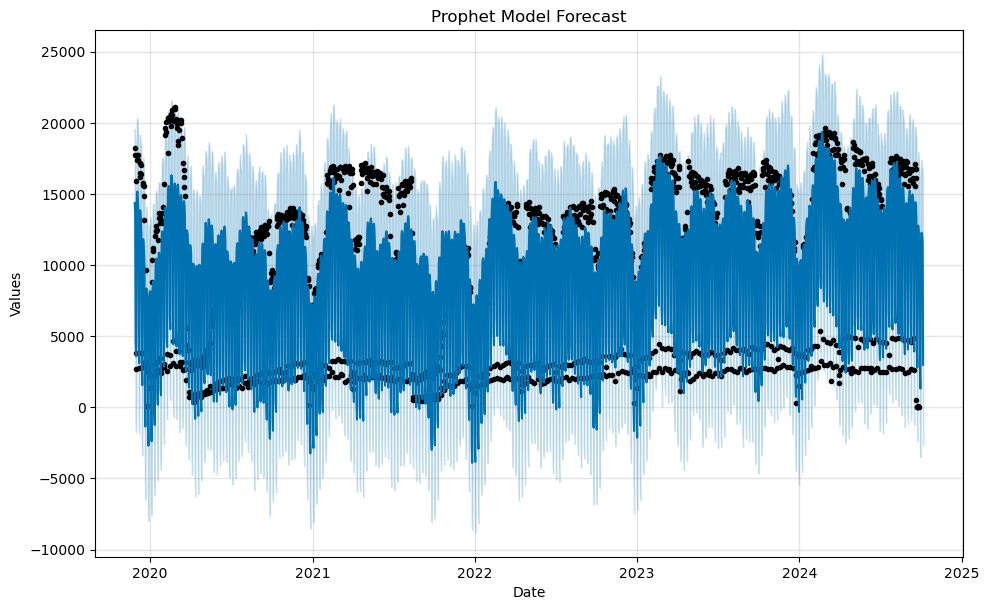

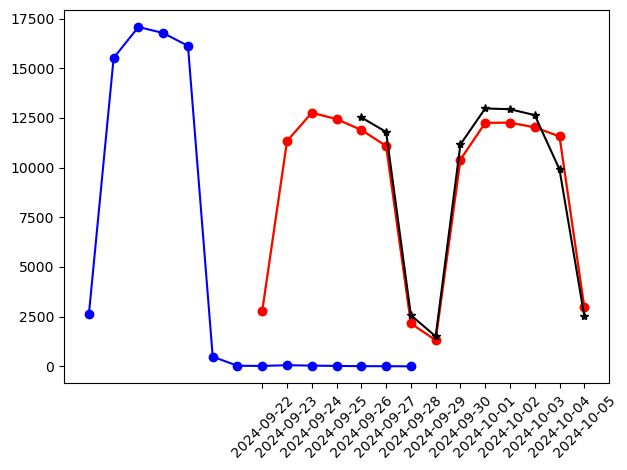

In [1163]:
import pandas as pd
import matplotlib.pyplot as plt



# print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


model.plot(forecast)
plt.title('Prophet Model Forecast')
plt.xlabel('Date')
plt.ylabel('Values')
plt.show()

plt.plot(forecast['ds'][-14:], forecast['yhat'][-14:], label='Forecast', marker='o', color='orange')
plt.plot(dp_pa['ds'][-14:], dp_pa['y'][-14:], label='Actual', marker='o', color='blue')

plt.plot(forecast['ds'][-14:], forecast['yhat'][-14:], label='Forecast', marker='o', color='red')
plt.plot(df_pt['ds'][-14:], df_pt['Blended'], label='blended', marker='*', color='black')
plt.xticks(forecast['ds'][-14:],rotation=45) 
# model.plot_components(forecast)
plt.tight_layout() 
plt.show()


In [520]:

def Pearson_correlation(X,Y):
    if len(X)==len(Y):
        Sum_xy = sum((X-X.mean())*(Y-Y.mean()))
        Sum_x_squared = sum((X-X.mean())**2)
        Sum_y_squared = sum((Y-Y.mean())**2)       
        corr = Sum_xy / np.sqrt(Sum_x_squared * Sum_y_squared)
    return corr

In [517]:
Pearson_correlation(dfm.iloc[:,3],dfm.iloc[:,4])



0.7555636470959444

12455.095158033673

In [524]:
df_p['y'][-4:].values

1758    485
1759     28
1760     21
1761     56
Name: y, dtype: int32

In [527]:
forecast['yhat'][:5].values

array([14482.98870087, 13950.88355874,  5005.66082428,  3971.25011752,
       12880.40584924])

In [530]:
(abs((df_p['y'][-5:].values - forecast['yhat'][:5].values) / df_p['y'][-5:].values).mean()) * 100

12455.095158033673

In [631]:
col = 0
model , forecast, df_p = Prophet_model(dfm,col)
print(dfm.columns[col-1])
plt.plot(forecast['ds'][-14:], forecast['yhat'][-14:], label='Forecast', marker='o', color='orange')
plt.plot(df_p['ds'][-14:], df_p['y'][-14:], label='Actual', marker='o', color='blue')


mean_ = forecast['yhat'].values.mean()
std = forecast['yhat'].values.std()

cv = std / mean
print(f'{dfm.columns[col]} CV: {cv:.2f}')

model.plot_components(forecast)

Date


KeyError: "['ds'] not in index"

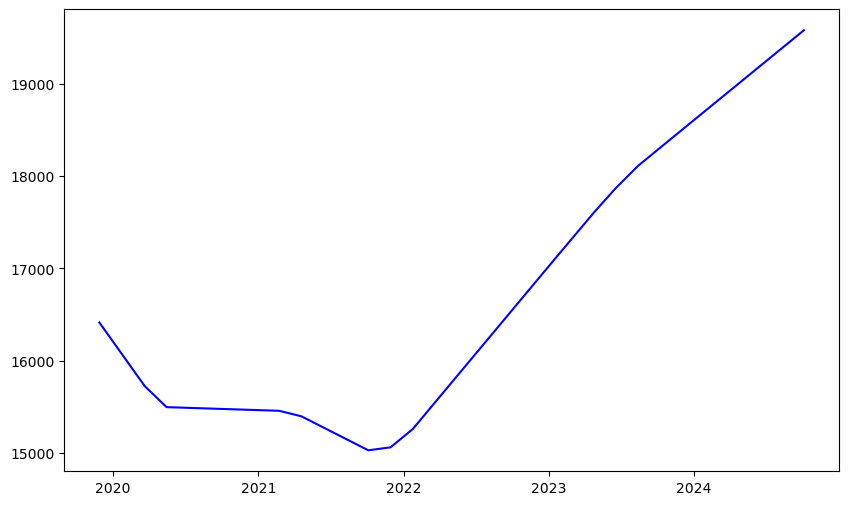

In [564]:
trend = forecast[['ds', 'trend']]

# trend = trend.iloc[-50:,:]

plt.figure(figsize=(10, 6))
plt.plot(trend['ds'], trend['trend'], label='Trend', color='blue')
# plt.fill_between(trend['ds'], 
#                  forecast['trend_lower'], 
#                  forecast['trend_upper'], 
#                  color='blue', alpha=0.2)

In [ ]:
plt.plot(forecast['ds'][-14:], forecast['yhat'][-14:], label='Forecast', marker='o', color='orange')
plt.plot(df_p['ds'][-14:], df_p['y'][-14:], label='Actual', marker='o', color='blue')

,ds,trend
0,2019-11-28,16413.972470
1,2019-11-29,16407.915054
2,2019-11-30,16401.857639
3,2019-12-01,16395.800223
4,2019-12-02,16389.742808
...,...,...
1767,2024-09-29,19563.826329
1768,2024-09-30,19567.345995
1769,2024-10-01,19570.865661
1770,2024-10-02,19574.385327


In [614]:
Pearson_correlation(dfm.iloc[:,1],dfm.iloc[:,2])

0.8723004307088699

In [1263]:
a = [1,2,3,4,5,0]

for i in a:
    for j in a:
        if i!=j:
            cor = Pearson_correlation(dfm.iloc[:,i],dfm.iloc[:,j])
            print(f'The correlation between {dfm.columns[i]} -> {dfm.columns[j]} is {cor:.2f}')
            
            

The correlation between Light Rail -> Peak Service is 0.88
The correlation between Light Rail -> Rapid Route is 0.97
The correlation between Light Rail -> School is 0.69
The correlation between Light Rail -> Other is <NA>
The correlation between Light Rail -> Local Route is 0.92
The correlation between Peak Service -> Light Rail is 0.88
The correlation between Peak Service -> Rapid Route is 0.94
The correlation between Peak Service -> School is 0.73
The correlation between Peak Service -> Other is <NA>
The correlation between Peak Service -> Local Route is 0.94
The correlation between Rapid Route -> Light Rail is 0.97
The correlation between Rapid Route -> Peak Service is 0.94
The correlation between Rapid Route -> School is 0.75
The correlation between Rapid Route -> Other is <NA>
The correlation between Rapid Route -> Local Route is 0.97
The correlation between School -> Light Rail is 0.69
The correlation between School -> Peak Service is 0.73
The correlation between School -> Rapid 

17:12:09 - cmdstanpy - INFO - Chain [1] start processing
17:12:10 - cmdstanpy - INFO - Chain [1] done processing


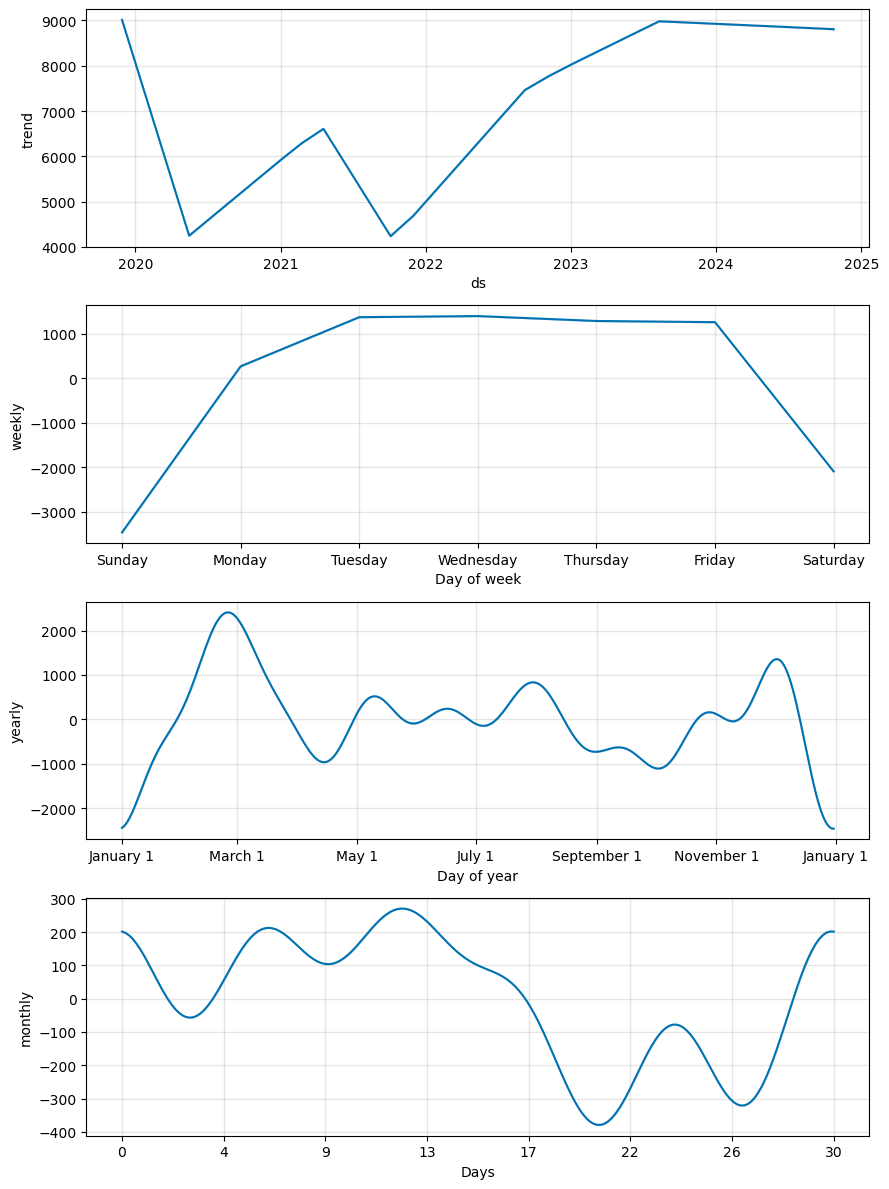

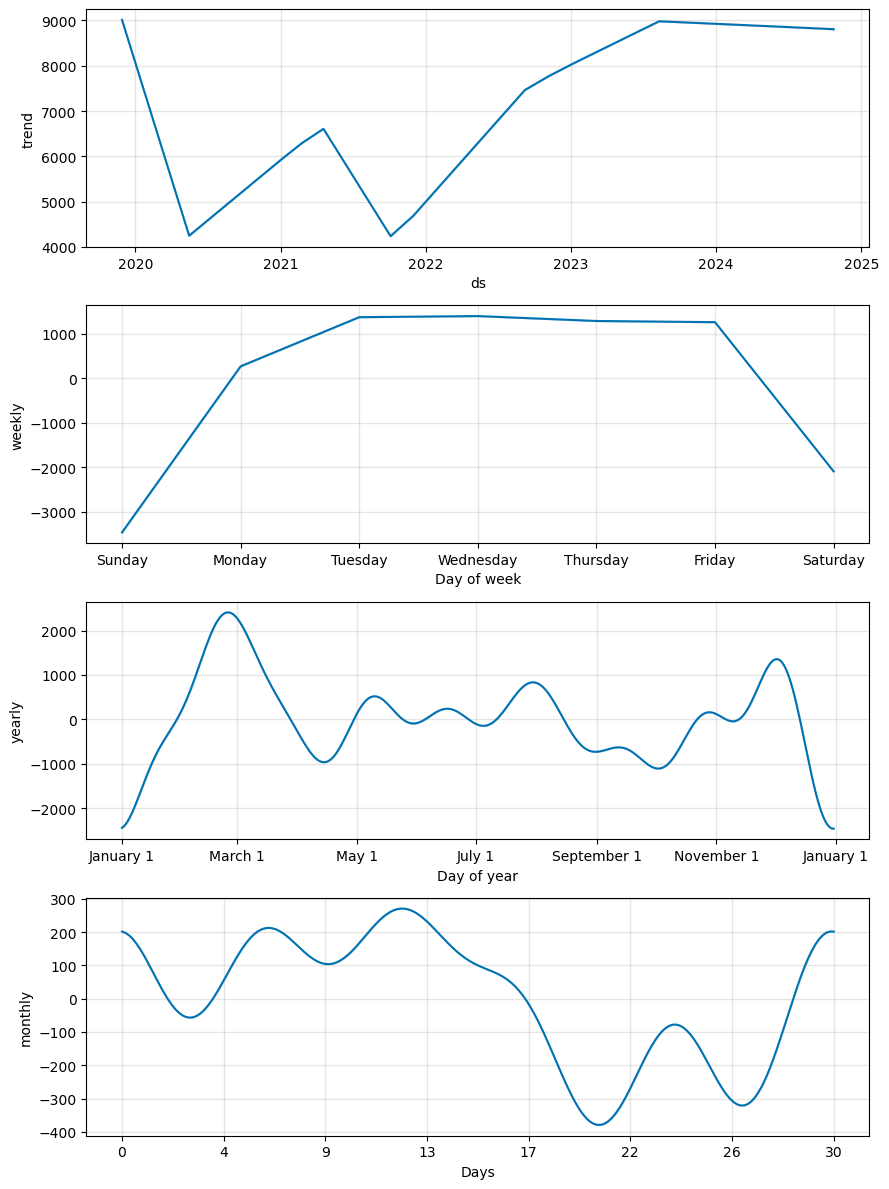

In [622]:


# Initialize the Prophet model
model = Prophet()

# Add monthly seasonality (repeat every 30.5 days, as a rough average for monthly seasonality)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# Fit the model
model.fit(df_p)

# Make a future dataframe
future = model.make_future_dataframe(periods=30)

# Predict the future
forecast = model.predict(future)

# Plot the components (including monthly seasonality)
model.plot_components(forecast)
